# Reading Some Libraries and Datasets

In [175]:
from scipy import stats
import numpy as np
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('seaborn-talk')

In [2]:
mp.Process
df_aisles = pd.read_csv("aisles.csv")
df_departments = pd.read_csv("departments.csv")
df_order_products_prior = pd.read_csv("order_products__prior.csv")
df_order_products_train = pd.read_csv("order_products__train.csv")
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

# Understanding each dataset

## Aisles
By investigating the aisles dataset we can see that there are 134 aisles. Each aisle is identified by a unique id. In addition to the id, each aisle has a name that identifies the kind of products in the aisle. Let's print out the first 5 and last 5 elements of this dataset:

In [3]:
print (df_aisles.head(5), sep="\n")
print (df_aisles.tail(5), sep="\n")
print ("Shape: ", df_aisles.shape)

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
     aisle_id                       aisle
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes
Shape:  (134, 2)


Let's check if is there any column with NULL values:

In [4]:
df_aisles.isnull().any(axis='index')

aisle_id    False
aisle       False
dtype: bool

As we can see, there are no values missing for the aisle dataset.

## Departments
Just like the aisle dataset, the department dataset contains the deparment id and its corresponding name. In total, the store is divided in 21 departments, as we may see bellow:

In [5]:
print("Lines:", df_departments.shape[0], "\tColumns:", df_departments.shape[1])
df_departments

Lines: 21 	Columns: 2


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Order Prior and Train
The order products is divided in three subsets: ``order_products__prior``, ``orders_products__train``, and ``orders_products__test``.
In the kaggle competition, only the prior and train subset is available. Let's see the first 5 lines for each of them:

In [6]:
df_order_products_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
df_order_products_train.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


As we can observe, both dasets contains 4 columns, indicating the order identifier, the product identifier, the order in which each product is bought and if the product was previously ordered (if this isn't the first time the customer is buying).

Let's verify if any of these two datasets have null values in any column:

In [8]:
print(df_order_products_prior.isnull().any(axis='index'), end='\n\n')
print(df_order_products_train.isnull().any(axis='index'))

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool


As verified, there are no missing values in both subsets.

## Orders

The ofders dataset maintains the register of all orders. It contains the order identifier; the user id; the evaluation set category (prior, train, test); the order number; the day of week that the order was placed; the hour of day in which the order ocurred and the amount of days since the previously order. Let's see the first 5 tuples for these data set bellow:

In [9]:
df_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


As we can verify above, the first line shows that the column ``days_since_prior_order`` contains missing values. Let's verify if there are any other columns with missing values and try to infer the reason for these missing values:

In [10]:
df_orders.isnull().any(axis='index')

order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool

As we can see above, there is only one column with missing values. This column is named as ``days_since_prior_order``. Let's check this tuples with missing values:

In [154]:
df_orders[df_orders.isnull().any(axis='columns') == True].head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN


In [12]:
df_orders[df_orders.isnull().any(axis='columns') == True].tail(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN
3421069,3154581,206209,prior,1,3,11,NaN


If we observe the columns for this subset containing missing values, it looks like that the missing values exist only for orders that were requested for the first time. This is observed by looking at the numerical sequence in column `user_id`. Let's confirm this by verifying the total amount of unique users in the dataset:

In [13]:
print ("Unique users id with equal missing id values: ", 
      np.sum(df_orders['user_id'].unique() == df_orders[df_orders.isnull().any(axis='columns') == True]['user_id']))
print ("Total users: ", len(df_orders['user_id'].unique()))

Unique users id with equal missing id values:  206209
Total users:  206209


As we can see, there are $206209$ missing values, and these missing values represents the first time a user has bought a product.

## Products

As it's possible to observe bellow, every tuple of the set products is composed of the product id, the name of the product, the aisle and department id where the products can ve found.

In [14]:
df_products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


As we can see bellow, this dataset does not have any missing values.

In [15]:
df_products.isnull().any(axis='index')

product_id       False
product_name     False
aisle_id         False
department_id    False
dtype: bool

# Data analysis


## Items per Aisle and Department
Let's first identify what is the most common product per aisle and per department.

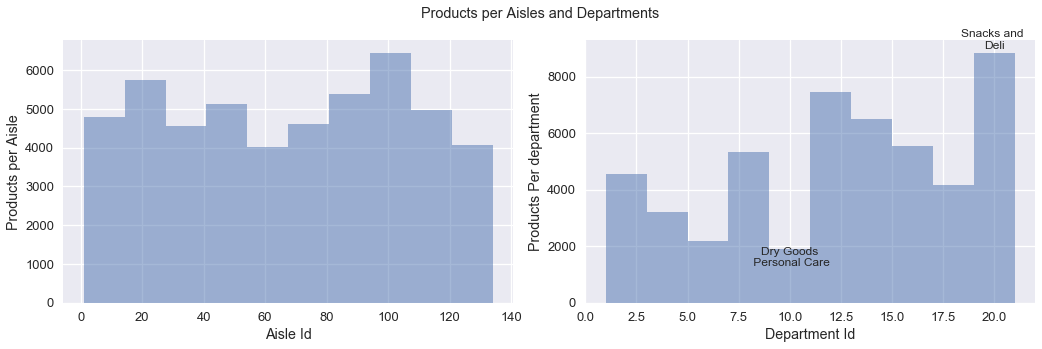

In [16]:
plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.tight_layout(pad=3, )
ax[0].hist(df_products['aisle_id'].values, alpha=0.5)
ax[1].hist(df_products['department_id'].values, alpha=0.5)
ax[0].set_xlabel("Aisle Id")
ax[0].set_ylabel("Products per Aisle")
ax[1].set_xlabel("Department Id")
ax[1].set_ylabel("Products Per department")
ax[1].text(20, 9000, "Snacks and \nDeli", ha='center')
ax[1].text(10, 1300, "Dry Goods\n Personal Care", ha='center')
fig.suptitle("Products per Aisles and Departments")

In [17]:
print(df_departments[df_departments['department_id'] == 19]['department'].values[0], 
     df_products[df_products['department_id'] == 19].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 20]['department'].values[0],
     df_products[df_products['department_id'] == 20].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 21]['department'].values[0],
     df_products[df_products['department_id'] == 21].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 9]['department'].values[0],
     df_products[df_products['department_id'] == 9].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 10]['department'].values[0],
     df_products[df_products['department_id'] == 10].shape[0], sep=': ')
print(df_departments[df_departments['department_id'] == 11]['department'].values[0],
     df_products[df_products['department_id'] == 11].shape[0], sep=': ')

snacks: 6264
deli: 1322
missing: 1258
dry goods pasta: 1858
bulk: 38
personal care: 6563


As we can obseve in both histograms showing above, we can note that the amount of products is spread throught all aisles without too much difference. We can also verify in the histogram for the products that in each department most of the products are in the department of number 20, which contains snacks and delicatessens. The department with less products are in the department of number 10 containing dry goods and personal care items.

## Analysis of Orders

With the code bellow we can see that the orders data set can be divided into three subgroups:
* **prior**: this are orders from users that have already bought something in the past.
* **train**: this are orders that are supposed to be used in the training dataset.
* **test**: this are the test samples in which we need to recommend new products.

Let's try to answer the following questions by focusing only in the prior subset of the data since this is the bigger subset.
* What is the average amount of days that a user awaits to buy again?
* Which day of the week users make more orders?
* What kind of products are bought in each day of the week? 
* Is there any trend for a specific day?
* What hour of day user's buy more? 
* Is there any trend towards a specific product given the hour?

In [164]:
df_orders_prior = df_orders[df_orders['eval_set']=='prior']
df_orders_train = df_orders[df_orders['eval_set']=='train']
df_orders_test  = df_orders[df_orders['eval_set']=='test']

print("Shape of set prior:", df_orders_prior.shape)
print("Shape of set train:", df_orders_train.shape)
print("Shape of set test: ", df_orders_test.shape)

Shape of set prior: (3214874, 7)
Shape of set train: (131209, 7)
Shape of set test:  (75000, 7)


The first thing we can infer about the subsets of orders is the amount of data in each subset. As we previously mentioned, the prior subset within orders is the bigger one containing over 3 million and 214 thousando orders followed by the subset train with over 132 thousand and the remaining orders bellonging to the subset test.

Let's try to identify what is the average rate of days that a user waits until the next order:

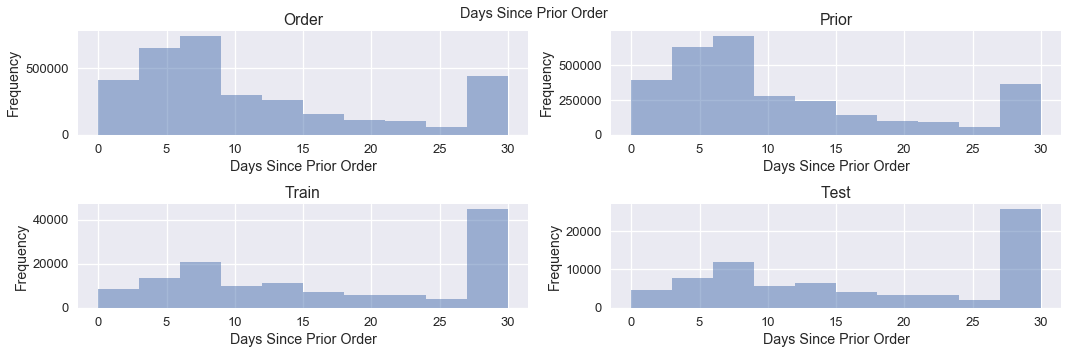

In [247]:
plt.rcParams['figure.figsize'] = (15, 5)
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)

def print_hist_days_since_prior_order(line, col, data, title):
    plt.sca(ax[line][col])
    plt.hist(data, alpha=0.5)
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel("Days Since Prior Order")

print_hist_days_since_prior_order(0, 0, df_orders['days_since_prior_order'].dropna().values, "Order")
print_hist_days_since_prior_order(0, 1, df_orders_prior['days_since_prior_order'].dropna().values, "Prior")
print_hist_days_since_prior_order(1, 0, df_orders_train['days_since_prior_order'].dropna().values, "Train")
print_hist_days_since_prior_order(1, 1, df_orders_test['days_since_prior_order'].dropna().values, "Test")
plt.suptitle("Days Since Prior Order")
plt.tight_layout(pad=1.08, w_pad=1, h_pad=1)

Observing the distribution of days since prior order, we can see that the majority of user makes orders in a range of 5 to 8 days considering the entire order dataset with a large group of user that also buys within 30 days after previous order. For the subset containing only prior orders, we can verify the same values, and we can assume that these users are making weekly orders.

For both subsets train and test, we can verify that there is a higher percentage of users that tends to make monthly orders (30 days after the prior order).

Let's investigate this a little bit further, by answering if people who order monthly buys more products than people who make orders weekly. Let's use the following function to compute the amount of products that are ordered after n days in ach order. Let's use the prior oders (subset of orders), since the amount of orders in it is way bigger than all others.

In [250]:
def get_products_after_n_days(ndays):
    products_in_day = list()
    ids_order = df_orders.query("days_since_prior_order == @ndays & eval_set == 'prior'")['order_id'].values
    np.random.shuffle(ids_order)
    ids_order = ids_order[0:1000]
    for idx in ids_order:
        qtd = df_order_products_prior.query("order_id == @idx").shape[0]
        products_in_day.append(qtd)
    return (ndays, products_in_day)

In [253]:
pool = mp.Pool(processes=mp.cpu_count())
products_in_day = {}
for prod in pool.imap_unordered(func=get_products_after_n_days, iterable=range(0, 31, 1)):
    print ("Finishing day:", prod[0])
    products_in_day[prod[0]] = prod[1]

Finishing day: 1
Finishing day: 9
Finishing day: 2
Finishing day: 11
Finishing day: 4
Finishing day: 7
Finishing day: 3
Finishing day: 5
Finishing day: 10
Finishing day: 0
Finishing day: 8
Finishing day: 6
Finishing day: 13
Finishing day: 15
Finishing day: 18
Finishing day: 16
Finishing day: 14
Finishing day: 19
Finishing day: 12
Finishing day: 21
Finishing day: 22
Finishing day: 17
Finishing day: 20
Finishing day: 23
Finishing day: 25
Finishing day: 30
Finishing day: 24
Finishing day: 26
Finishing day: 28
Finishing day: 29
Finishing day: 27


In [255]:
ord_prod_day = pd.DataFrame(products_in_day)

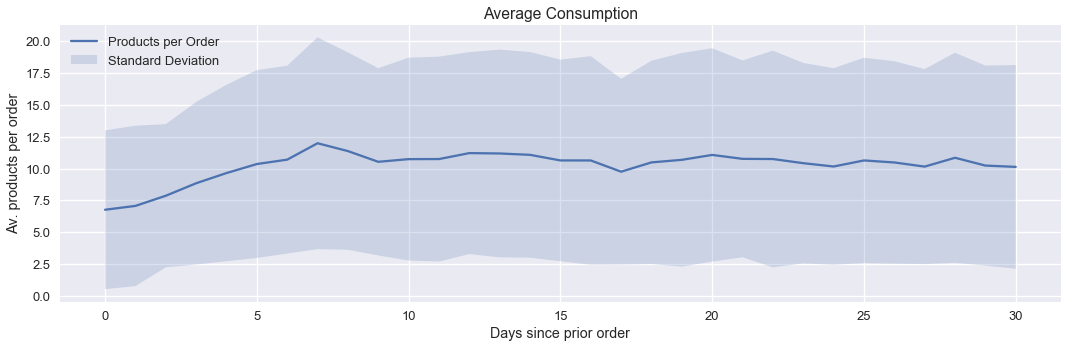

In [23]:
plt.plot(ord_prod_day.mean(), label='Products per Order')
plt.fill_between(np.arange(0, 31, 1),
                 ord_prod_day.mean()+ord_prod_day.std(), 
                 ord_prod_day.mean()-ord_prod_day.std(),
                 alpha=0.2, label="Standard Deviation")
plt.xlabel("Days since prior order")
plt.ylabel("Av. products per order")
plt.legend(loc="upper left")
plt.title("Average Consumption")
plt.tight_layout()

In the chart above is shown the average product consumption after $n$ days since the prior order.
As we can see, there is a certain trend indicating that most of the users that makes orders weekly tend to make a second order containing around $6$ to $10$ products in each order.
After one week of the prior order, there are no difference in the amount of products that are ordered again. As we can see, the average product consumption per order after the first 7 days remains constant around $10$ and $12$ products per order.

Another interesting result that we can obtain from the orders dataset is the amount of orders that are made for each day of the week. We can infer this information by looking at the the following chart.

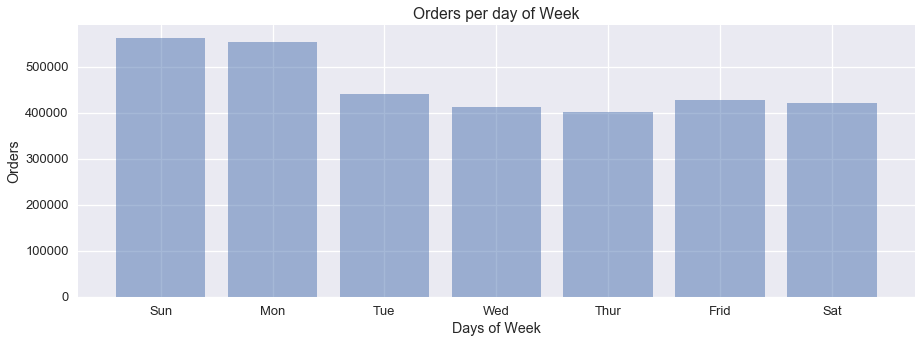

In [20]:
orders_week = df_orders.dropna().groupby('order_dow').count().values[0:,0]
plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(np.arange(0, 7), orders_week, alpha=0.5)
plt.xticks(range(0,7), ["Sun","Mon", "Tue", "Wed", "Thur", "Frid", "Sat"])
plt.xlabel("Days of Week")
plt.ylabel("Orders")
plt.title("Orders per day of Week")

As we can observe above, users make more orders on Sunday and Monday. The day that users order less products is on Thursday.
We can also verify what time of the day users buy more. The following chart describes using box-plot what are the most prominent time that users make more orders.

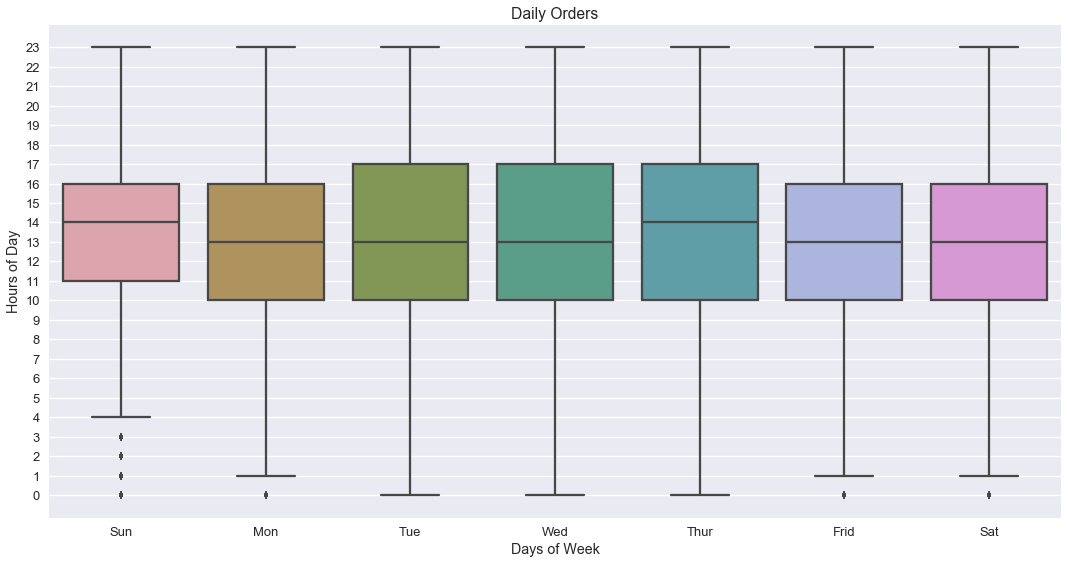

In [269]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.boxplot(df_orders['order_dow'], df_orders["order_hour_of_day"], saturation=0.5)
plt.xlabel("Days of Week")
plt.ylabel("Hours of Day")
plt.xticks(range(0,7), ["Sun","Mon", "Tue", "Wed", "Thur", "Frid", "Sat"])
plt.yticks(range(0,24, 1), range(0,24, 1))
plt.title("Daily Orders")
plt.tight_layout()

As we can observe in the boxplot, in all days of the week, $50\%$ of the Instacart users make orders during $10$ o'clock and $17$ o'clock. With exception of Sunday, the first quartile in all days of the week shows that the ordered products occur during midnight and $10$ o'clock. On Sundays, the first quartile of the population only makes order of products after $4$ o'clock, with a few outliers that are spread during the remaining hours of dawn. The fourth quartile allows us to identify that $25\%$ of users order products after $17$ o'clock. We can also observe for the first and fourth quartile that the time length of orders that occur for the first quartile are more widespread than for the fourth quartile.

Now let's try to identify what are the most ordered products. We can infer this by looking at the **products** dataset.

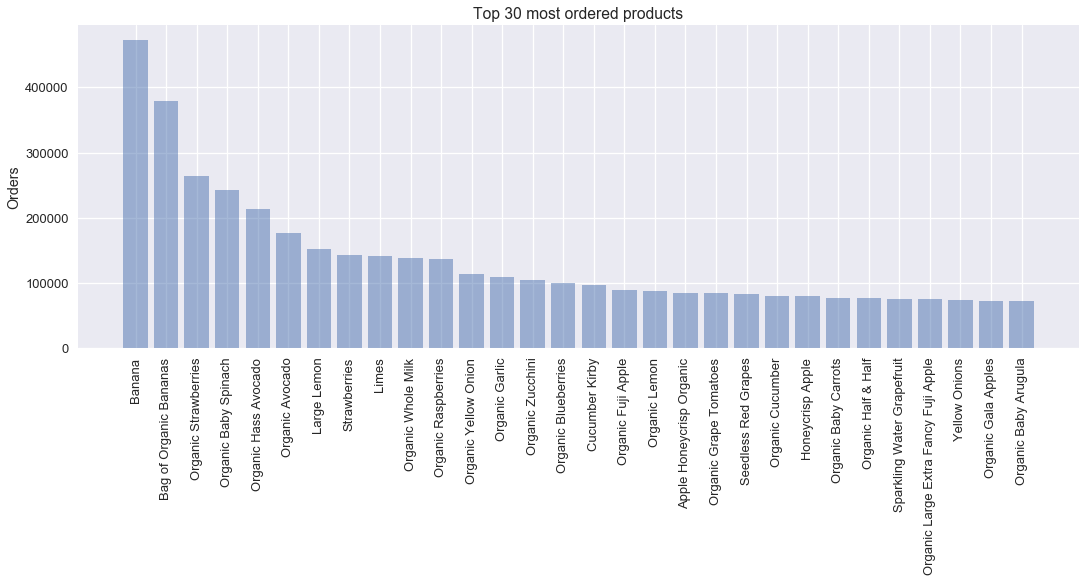

In [270]:
df_count_products = df_order_products_prior.groupby('product_id').count()
sorted_products = df_count_products.sort_values(by='order_id', ascending=False)

plt.rcParams["figure.figsize"] = (15, 8)
plt.bar(np.arange(0, 30, 1), sorted_products['order_id'][0:30], alpha=0.5)
a = plt.xticks(np.arange(0, 30), 
        [df_products['product_name'][df_products['product_id'] == idx].values[0] 
         for idx in sorted_products.index[0:30]], rotation='vertical')
plt.tight_layout()
plt.ylabel("Orders")
plt.title("Top 30 most ordered products")

Let's try to identify the departments and corresponding aisles that have more orders.

In [23]:
most_frequent_department = dict()
most_frequent_aisle = dict()
for index in sorted_products.index.values:
    a = df_products[df_products['product_id'] == index][['department_id','aisle_id']]
    dp = a['department_id'].values[0]
    al = a['aisle_id'].values[0]
    if dp in most_frequent_department:
        most_frequent_department[dp] = most_frequent_department[dp] + 1
    else:
        most_frequent_department[dp] = 1
    if al in most_frequent_aisle:
        most_frequent_aisle[al] = most_frequent_aisle[al] + 1
    else:
        most_frequent_aisle[al] = 1

most_frequent_department = pd.DataFrame({'dep_id':list(most_frequent_department.keys()),
                                         'qt_order':list(most_frequent_department.values())})
most_frequent_aisle = pd.DataFrame({'aisle_id':list(most_frequent_aisle.keys()),
                                    'aisle_order':list(most_frequent_aisle.values())})

most_frequent_aisle = most_frequent_aisle.sort_values(by='aisle_order', ascending=False)
most_frequent_department = most_frequent_department.sort_values(by='qt_order', ascending=False)

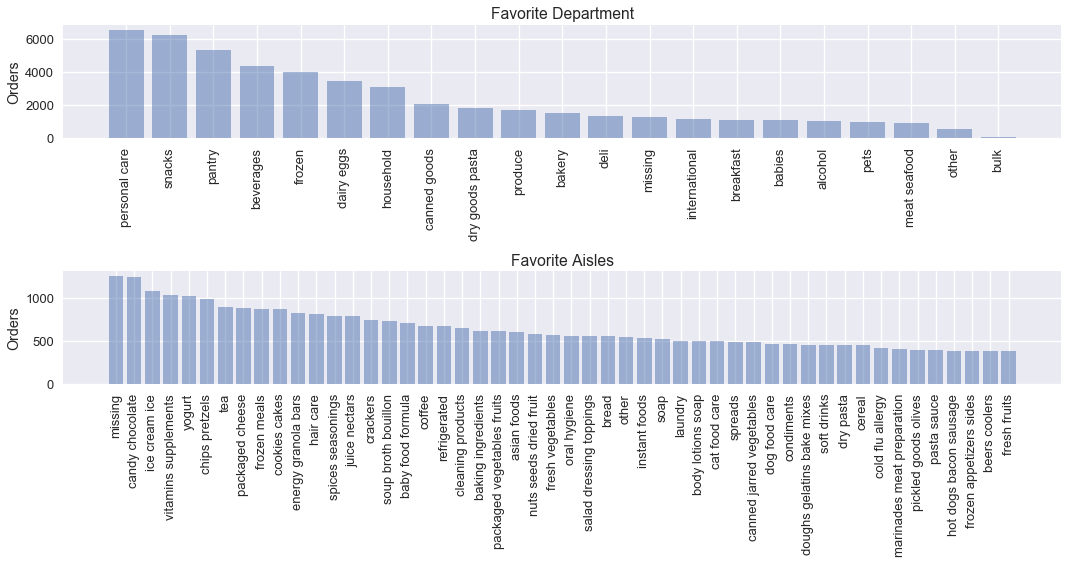

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plt.rcParams["figure.figsize"] = (15, 10)

def plot_orders(inst, order_id, order_freq, title):
    ax[inst].bar(np.arange(len(order_id)), order_freq, alpha=0.5)
    plt.sca(ax[inst])
    plt.xticks(np.arange(len(order_id)), order_id, rotation='vertical')
    plt.title(title)
    plt.ylabel("Orders")

dep_names = [df_departments[df_departments['department_id'] == idx]['department'].values[0] 
             for idx in most_frequent_department['dep_id']]
ais_names = [df_aisles[df_aisles['aisle_id'] == idx]['aisle'].values[0]
             for idx in most_frequent_aisle['aisle_id']]
plot_orders(0, dep_names, most_frequent_department['qt_order'], "Favorite Department")
plot_orders(1, ais_names[0:50], most_frequent_aisle['aisle_order'][0:50], "Favorite Aisles")
plt.tight_layout()

The two charts above shows the amount of orders per department and per aisles. Regarding the departments, the two most
favorite are personal care and snacks items with over 6000 orders from each of them. Regarding the aisle, the two favorite aisles with over 1200 orders is the aisle of candy chocolate. The first aisle labeled as missing has a variety of products that weren't labeled to a given specific aisle, so it's difficult to infer the type of products in it.

We have previously discovered that in the Orders dataset there are orders with empty values for the column `days_since_prior_order`. We afirmed that these tuples were first time orders. We can investigate these products a little bit further to infer what products are bought for the first time. Let's first gather all first time orders from customers and then shuffle these orders ids. The shuffle is necessary in order to maintain randomization of the selected ordered products:

In [33]:
def get_products_in_order(order_id):
    return df_order_products_prior[df_order_products_prior['order_id'] == order_id]['product_id'].values

pool = mp.Pool(processes=mp.cpu_count())
first_order = df_orders[df_orders.isnull().any(axis='columns')==True]['order_id'].values
np.random.shuffle(first_order)

After gathering the ids of first time orders, we can gather the products ids for each order into a dictionary and count how many times a specific product was ordered. Since there are over 200 thousand new orders, we are going to compute the orders for a random subset of size $n$ of these orders. To get the random subset we only need to capture the first $n$ orders, since the orders were shuffled in the previous cell.

In [42]:
first_order_prod_id = {}
random_sample = 10000
for prod in pool.imap_unordered(func=get_products_in_order, iterable=first_order[0:random_sample]):
    for idx in prod:
        if idx in  first_order_prod_id:
            first_order_prod_id[idx] += 1
        else:
            first_order_prod_id[idx] = 1

In [43]:
first_order_prod_id = pd.DataFrame({"prod_id":list(first_order_prod_id.keys()), 
                                    "orders":list(first_order_prod_id.values())})
first_order_prod_id = first_order_prod_id.sort_values('orders', ascending=False)

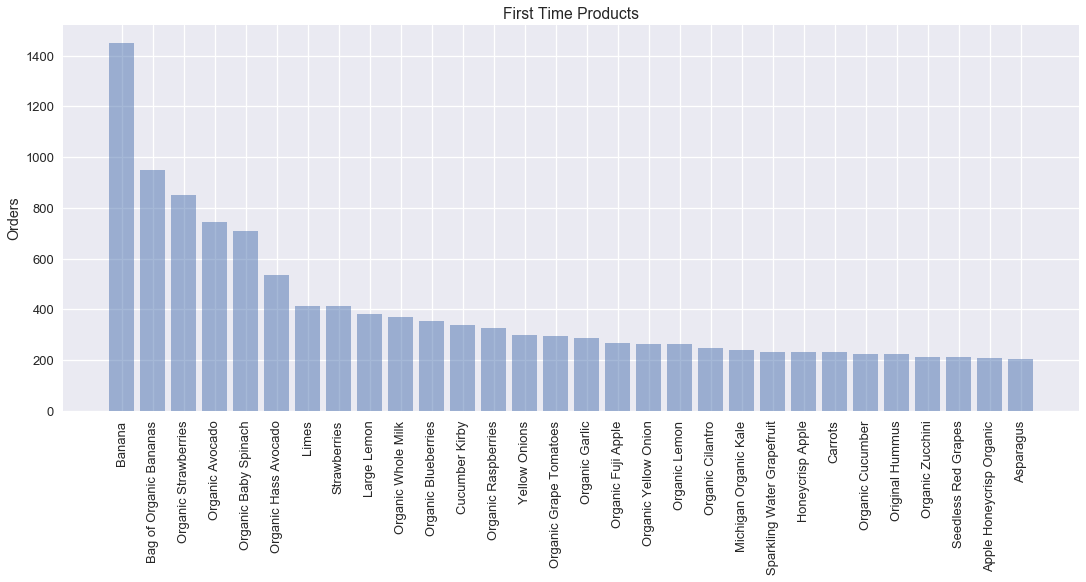

In [271]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.bar(np.arange(30), first_order_prod_id['orders'][0:30], alpha=0.5)
first_time_products = [df_products[df_products['product_id'] == idx]['product_name'].values[0] 
                       for idx in first_order_prod_id['prod_id'][0:30].values]
a = plt.xticks(np.arange(30), first_time_products[0:30], rotation='vertical')
plt.tight_layout()
plt.title("First Time Products")
plt.ylabel("Orders")

It appears that the products that are bought for the first time looks like to be the most popular products already computed before (most ordered products). Let's see the relationship of the **most popular products** and the **first time products** using Pearson, Spearman and Kendall correlation.

In [281]:
corr = pd.DataFrame({'first_order':first_order_prod_id['prod_id'].values[0:100],
                     'favorite_order':sorted_products.index.values[0:100]})

In [285]:
corr.head(5)

,favorite_order,first_order
0,24852,24852
1,13176,13176
2,21137,21137
3,21903,47766
4,47209,21903


In [289]:
lcorr = list()
for index in range(1, 30, 1):
    pears = corr[0:index].corr('pearson')
    spear = corr[0:index].corr('spearman')
    kend  = corr[0:index].corr('kendall')
    lcorr.append((index, pears['first_order'][0], spear['first_order'][0], kend['first_order'][0]))
lcorr = np.asarray(lcorr)

lcorr = pd.DataFrame({'Pearson':lcorr[0:, 1], "Spearman": lcorr[0:, 2], "Kendall":lcorr[0:, 3]})

/home/clebsonc/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3577: RuntimeWarning: invalid value encountered in double_scalars
  size * (size - 1) * (size - 2))


In [290]:
lcorr.head(5)

,Kendall,Pearson,Spearman
0,NaN,NaN,NaN
1,1.000000,1.000000,1.0
2,1.000000,1.000000,1.0
3,0.666667,0.526609,0.8
4,0.400000,0.019404,0.6


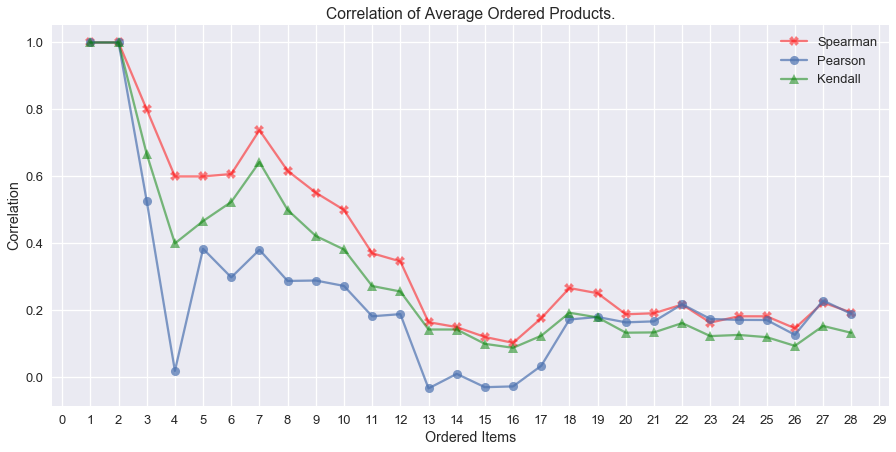

In [292]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(lcorr['Spearman'], label='Spearman', alpha=0.5, marker='X', color='red')
plt.plot(lcorr['Pearson'], label='Pearson', alpha=0.7, marker='o')
plt.plot(lcorr['Kendall'], label='Kendall', alpha=0.5, marker='^', color='green')
plt.legend(loc='upper right')
plt.xticks(np.arange(30), np.arange(0, 30))
plt.xlabel("Ordered Items")
plt.ylabel("Correlation")
plt.title("Correlation of Average Ordered Products.")

The above chart shows the Pearson and Spearman correlation considering two variables: first time order and most popular products. We can see that the there's a higher correlation of these variables if the amount of products that are ordering is small. Usually, when people are buying for the first time, the first items that they usually order are exactly the same as the most frequent items in instacart (i.e: bananas and bag of organic bananas).

Now, let's try to answer if there is any specific product that sells more in a given day of the week. Let's try to infer as well what kind of products sells more in any specific time of the day.

In [405]:
def get_products_in_day(args):
    day = args[0]
    total_orders = args[1]
    print ("Day ", day, "Orders: ", total_orders)
    prod_in_day = {}  # dictionary that will hold the items for a given day
    orders_in_day = df_orders_prior[df_orders_prior['order_dow'] == day]['order_id'].values
    np.random.shuffle(orders_in_day)
    for oid in orders_in_day[0:total_orders]:  # get the products with order id equals oid
        products = df_order_products_prior.query('order_id == @oid')['product_id'].values
        for pid in products:
            if pid in prod_in_day:
                prod_in_day[pid] += 1
            else:
                prod_in_day[pid] = 1
    return (day, prod_in_day)

In [ ]:
pool = mp.Pool(processes=mp.cpu_count())
dic_days_of_week = {}
days_of_week = df_orders_prior['order_dow'].unique()
days_of_week = zip(days_of_week, len(days_of_week)*[10000])

for prod in pool.imap_unordered(func=get_products_in_day, iterable=days_of_week):
    dic_days_of_week[prod[0]] = prod[1]

Day  4 Orders:  10000
Day  0 Orders:  10000
Day  6 Orders:  10000
Day  1 Orders:  10000
Day  3 Orders:  10000
Day  5 Orders:  10000
Day  2 Orders:  10000


In [482]:
day0 = pd.DataFrame({"prod_id":list(dic_days_of_week[0].keys()), "quantity":list(dic_days_of_week[0].values())})
day1 = pd.DataFrame({"prod_id":list(dic_days_of_week[1].keys()), "quantity":list(dic_days_of_week[1].values())})
day2 = pd.DataFrame({"prod_id":list(dic_days_of_week[2].keys()), "quantity":list(dic_days_of_week[2].values())})
day3 = pd.DataFrame({"prod_id":list(dic_days_of_week[3].keys()), "quantity":list(dic_days_of_week[3].values())})
day4 = pd.DataFrame({"prod_id":list(dic_days_of_week[4].keys()), "quantity":list(dic_days_of_week[4].values())})
day5 = pd.DataFrame({"prod_id":list(dic_days_of_week[5].keys()), "quantity":list(dic_days_of_week[5].values())})
day6 = pd.DataFrame({"prod_id":list(dic_days_of_week[6].keys()), "quantity":list(dic_days_of_week[6].values())})

day0 = day0.sort_values(by="quantity", ascending=False)
day1 = day1.sort_values(by="quantity", ascending=False)
day2 = day2.sort_values(by="quantity", ascending=False)
day3 = day3.sort_values(by="quantity", ascending=False)
day4 = day4.sort_values(by="quantity", ascending=False)
day5 = day5.sort_values(by="quantity", ascending=False)
day6 = day6.sort_values(by="quantity", ascending=False)

day0_prod_name = [df_products[df_products['product_id'] == pid]['product_name'].values[0] 
                  for pid in day0['prod_id'].head(10).values]
day1_prod_name = [df_products[df_products['product_id'] == pid]['product_name'].values[0] 
                  for pid in day1['prod_id'].head(10).values]
day2_prod_name = [df_products[df_products['product_id'] == pid]['product_name'].values[0] 
                  for pid in day2['prod_id'].head(10).values]
day3_prod_name = [df_products[df_products['product_id'] == pid]['product_name'].values[0]
                  for pid in day3['prod_id'].head(10).values]
day4_prod_name = [df_products[df_products['product_id'] == pid]['product_name'].values[0] 
                  for pid in day4['prod_id'].head(10).values]
day5_prod_name = [df_products[df_products['product_id'] == pid]['product_name'].values[0] 
                  for pid in day5['prod_id'].head(10).values]
day6_prod_name = [df_products[df_products['product_id'] == pid]['product_name'].values[0]
                  for pid in day6['prod_id'].head(10).values]

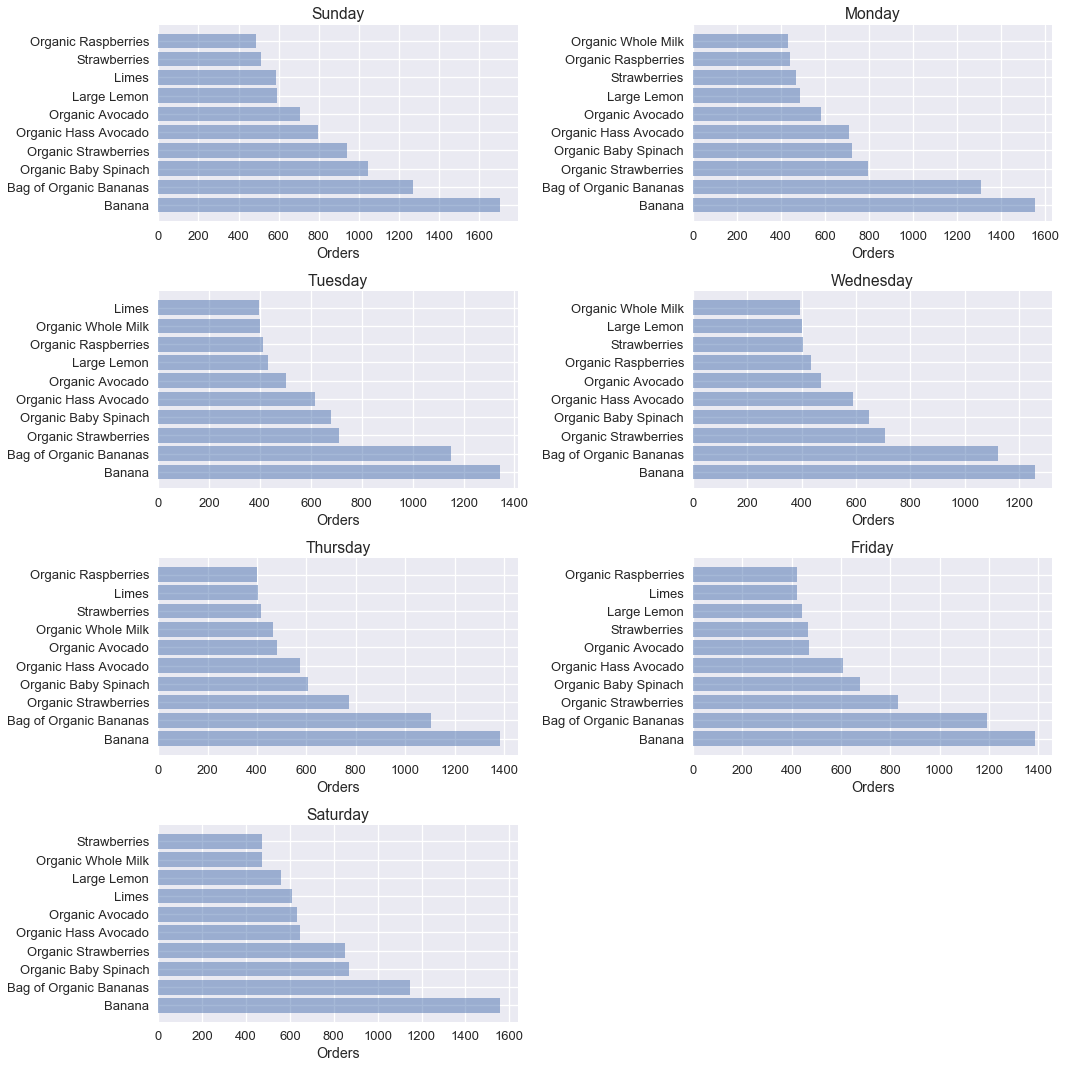

In [481]:
plt.rcParams['figure.figsize'] = (15, 15)
fig, ax = plt.subplots(nrows=4, ncols=2)

def plot_products_per_day(line, column, quantity, names, title):
    plt.sca(ax[line][column])
    plt.barh(np.arange(len(names)), quantity, alpha=0.5)
    plt.yticks(np.arange(len(names)), names)
    plt.xlabel('Orders')
    plt.title(title)
    plt.tight_layout()

plot_products_per_day(0, 0, day0["quantity"].values[0:10], day0_prod_name, "Sunday")
plot_products_per_day(0, 1, day1["quantity"].values[0:10], day1_prod_name, "Monday")
plot_products_per_day(1, 0, day2["quantity"].values[0:10], day2_prod_name, "Tuesday")
plot_products_per_day(1, 1, day3["quantity"].values[0:10], day3_prod_name, "Wednesday")
plot_products_per_day(2, 0, day4["quantity"].values[0:10], day4_prod_name, "Thursday")
plot_products_per_day(2, 1, day5["quantity"].values[0:10], day5_prod_name, "Friday")
plot_products_per_day(3, 0, day6["quantity"].values[0:10], day6_prod_name, "Saturday")
a = ax[3][1].axis('off')

The above chart shows the orders for a random subsample of size $10000$ of ordered products for each day of the week. As we can observe, for all days of the week the favorite products are bananas. Thre isn't much difference of the most favourite products and the products that are ordered for the first time.

Now let's consider what are the most frequent item considering the time in which each order was done. Let's consider three the following periods of the day:
* **Morning:** from 6 o'clock to 12 o'clock    
* **Afternoon:** from 13 o'clock to 18 o'clock
* **Evening:** from 19 o'clock to midnight
* **Dawn:** from 0 to 5 o'clock

In [502]:
dawn_order = df_orders_prior.query("order_hour_of_day >= 0 & order_hour_of_day < 6")['order_id'].values
morning_order = df_orders_prior.query("order_hour_of_day >= 6 & order_hour_of_day < 12")['order_id'].values
afternoon_order = df_orders_prior.query("order_hour_of_day >= 12 & order_hour_of_day < 19")['order_id'].values
evening_order = df_orders_prior.query("order_hour_of_day >= 19")['order_id'].values
np.random.shuffle(dawn_order)
np.random.shuffle(morning_order)
np.random.shuffle(afternoon_order)
np.random.shuffle(evening_order)

In [510]:
pool = mp.Pool(processes=mp.cpu_count())

def get_products_in_hour(order):
    products_in_hour = {}
    for prod in pool.imap_unordered(func=get_products_in_order, iterable=order):
        for pid in prod:
            if pid in products_in_hour:
                products_in_hour[pid] += 1
            else:
                products_in_hour[pid] = 1
    return products_in_hour

dawn_products = get_products_in_hour(dawn_order[0:10000])
morning_products = get_products_in_hour(morning_order[0:1000])
afternoon_products = get_products_in_hour(afternoon_order[0:1000])
evening_products = get_products_in_hour(evening_order[0:1000])

In [519]:
dawn_products = pd.DataFrame.from_dict(dawn_products, orient='index')
morning_products = pd.DataFrame.from_dict(morning_products, orient='index')
afternoon_products = pd.DataFrame.from_dict(afternoon_products, orient='index')
evening_products = pd.DataFrame.from_dict(evening_products, orient='index')

In [524]:
dawn_products = dawn_products.sort_values(by=0, ascending=False)
morning_products = morning_products.sort_values(by=0, ascending=False)
afternoon_products = afternoon_products.sort_values(by=0, ascending=False)
evening_products = evening_products.sort_values(by=0, ascending=False)

In [542]:
name_dawn_products = [df_products[df_products['product_id'] == pid]['product_name'].values[0]
                      for pid in list(dawn_products.index[0:10])]
name_morning_products = [df_products[df_products['product_id'] == pid]['product_name'].values[0]
                         for pid in list(morning_products.index[0:10])]
name_afternoon_products = [df_products[df_products['product_id'] == pid]['product_name'].values[0]
                           for pid in list(afternoon_products.index[0:10])]
name_evening_products = [df_products[df_products['product_id'] == pid]['product_name'].values[0]
                         for pid in list(evening_products.index[0:10])]

In [559]:
dawn_products.values[0:10, 0]

array([1295, 1167,  779,  764,  625,  496,  459,  427,  404,  384])

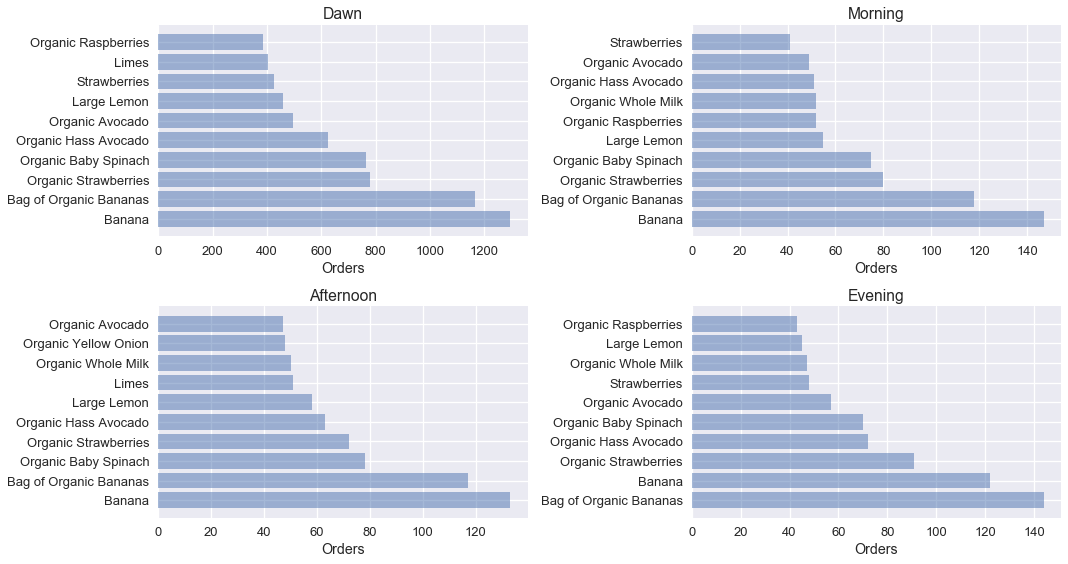

In [564]:
plt.rcParams['figure.figsize'] = (15, 8)
fig, ax = plt.subplots(nrows=2, ncols=2)
plot_products_per_day(0, 0, dawn_products.values[0:10, 0], name_dawn_products, "Dawn")
plot_products_per_day(0, 1, morning_products.values[0:10, 0], name_morning_products, "Morning")
plot_products_per_day(1, 0, afternoon_products.values[0:10, 0], name_afternoon_products, "Afternoon")
plot_products_per_day(1, 1, evening_products.values[0:10, 0], name_evening_products, "Evening")

# IDEAS
* Let's discover by using a linear regression the consumption after N days (take as example the plot of average consumption)

In [293]:
print("there")

there
